In [1]:
import pandas as pd
import geopandas 
import pysal as ps 
block_grp = geopandas.read_file("2018NYblockgrpSF/tl_2018_36_bg.shp")
block_grp = block_grp.rename(columns={'TRACTCE': 'Tract', 'BLKGRPCE': 'Block'})
erie_county_blockGrp = block_grp[(block_grp.COUNTYFP == "029")]
buffalo_tracts = pd.read_csv("2018NYblockgrpSF/Tracts_data.csv")
buffalo_tracts['TRACT'] = buffalo_tracts['TRACT'].apply(lambda x: str(x).zfill(6))
buffalo = erie_county_blockGrp.loc[erie_county_blockGrp.Tract.isin(list(buffalo_tracts['TRACT']))]


In [8]:
buffalo['unique'] = buffalo['Tract'] + buffalo['Block']

C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


74       0168002
75       0168001
76       0168004
817      0066021
835      0169004
          ...   
12711    0028003
13523    0163001
13524    0167003
13525    0164004
13526    0164003
Name: unique, Length: 287, dtype: object

In [10]:
Q_w = ps.lib.weights.Queen.from_dataframe(buffalo, idVariable='unique')

In [11]:
Matrix, ids = Q_w.full()
ids 

['0001101',
 '0001102',
 '0001103',
 '0001104',
 '0002001',
 '0002002',
 '0002003',
 '0002004',
 '0005001',
 '0005002',
 '0006001',
 '0006002',
 '0006003',
 '0006004',
 '0007001',
 '0007002',
 '0007003',
 '0007004',
 '0007005',
 '0008001',
 '0008002',
 '0008003',
 '0008004',
 '0009001',
 '0009002',
 '0009003',
 '0010001',
 '0010002',
 '0010003',
 '0010004',
 '0010005',
 '0011001',
 '0011002',
 '0011003',
 '0014021',
 '0014022',
 '0014023',
 '0014024',
 '0015001',
 '0015002',
 '0016001',
 '0016002',
 '0016003',
 '0016004',
 '0017001',
 '0017002',
 '0019001',
 '0019002',
 '0019003',
 '0023001',
 '0023002',
 '0023003',
 '0023004',
 '0024001',
 '0024002',
 '0024003',
 '0024004',
 '0024005',
 '0024006',
 '0025021',
 '0025022',
 '0027021',
 '0027022',
 '0027023',
 '0027024',
 '0028001',
 '0028002',
 '0028003',
 '0028004',
 '0029001',
 '0029002',
 '0029003',
 '0029004',
 '0030001',
 '0030002',
 '0030003',
 '0031001',
 '0031002',
 '0031003',
 '0031004',
 '0033011',
 '0033012',
 '0033013',
 '00

In [15]:
qw_df = pd.DataFrame(Matrix, index = ids, columns = ids)

In [20]:
qw_df = qw_df.astype(int)

In [107]:
qw_df.to_csv("qw_df.csv", index = True)

In [86]:
combined_aa = pd.read_csv('aa_population_2013_to_2018.csv')

In [87]:
combined_aa.set_index('unique')

,aa2013,aa2018,> 10% decrease,> 10% increase
unique,,,,
43003,931,546,True,False
43004,237,367,False,True
43005,973,865,True,False
43006,650,520,True,False
43007,242,675,False,True
...,...,...,...,...
171001,287,167,True,False
171002,617,278,True,False
171003,227,391,False,True


In [88]:
combined_aa['unique'] = combined_aa['unique'].apply(lambda x: str(x).zfill(7)).astype(str)

In [89]:
combined_aa = combined_aa.set_index('unique')

In [90]:
decreased_tracts = combined_aa['> 10% decrease'].loc[combined_aa['> 10% decrease'] == True].index
increased_tracts = combined_aa['> 10% increase'].loc[combined_aa['> 10% increase'] == True].index

In [98]:
decreased_tracts

Index(['0043003', '0043005', '0043006', '0044011', '0044021', '0045001',
       '0045002', '0045003', '0045004', '0045005',
       ...
       '0166002', '0166004', '0168002', '0168004', '0169001', '0169002',
       '0169003', '0171001', '0171002', '0171004'],
      dtype='object', name='unique', length=119)

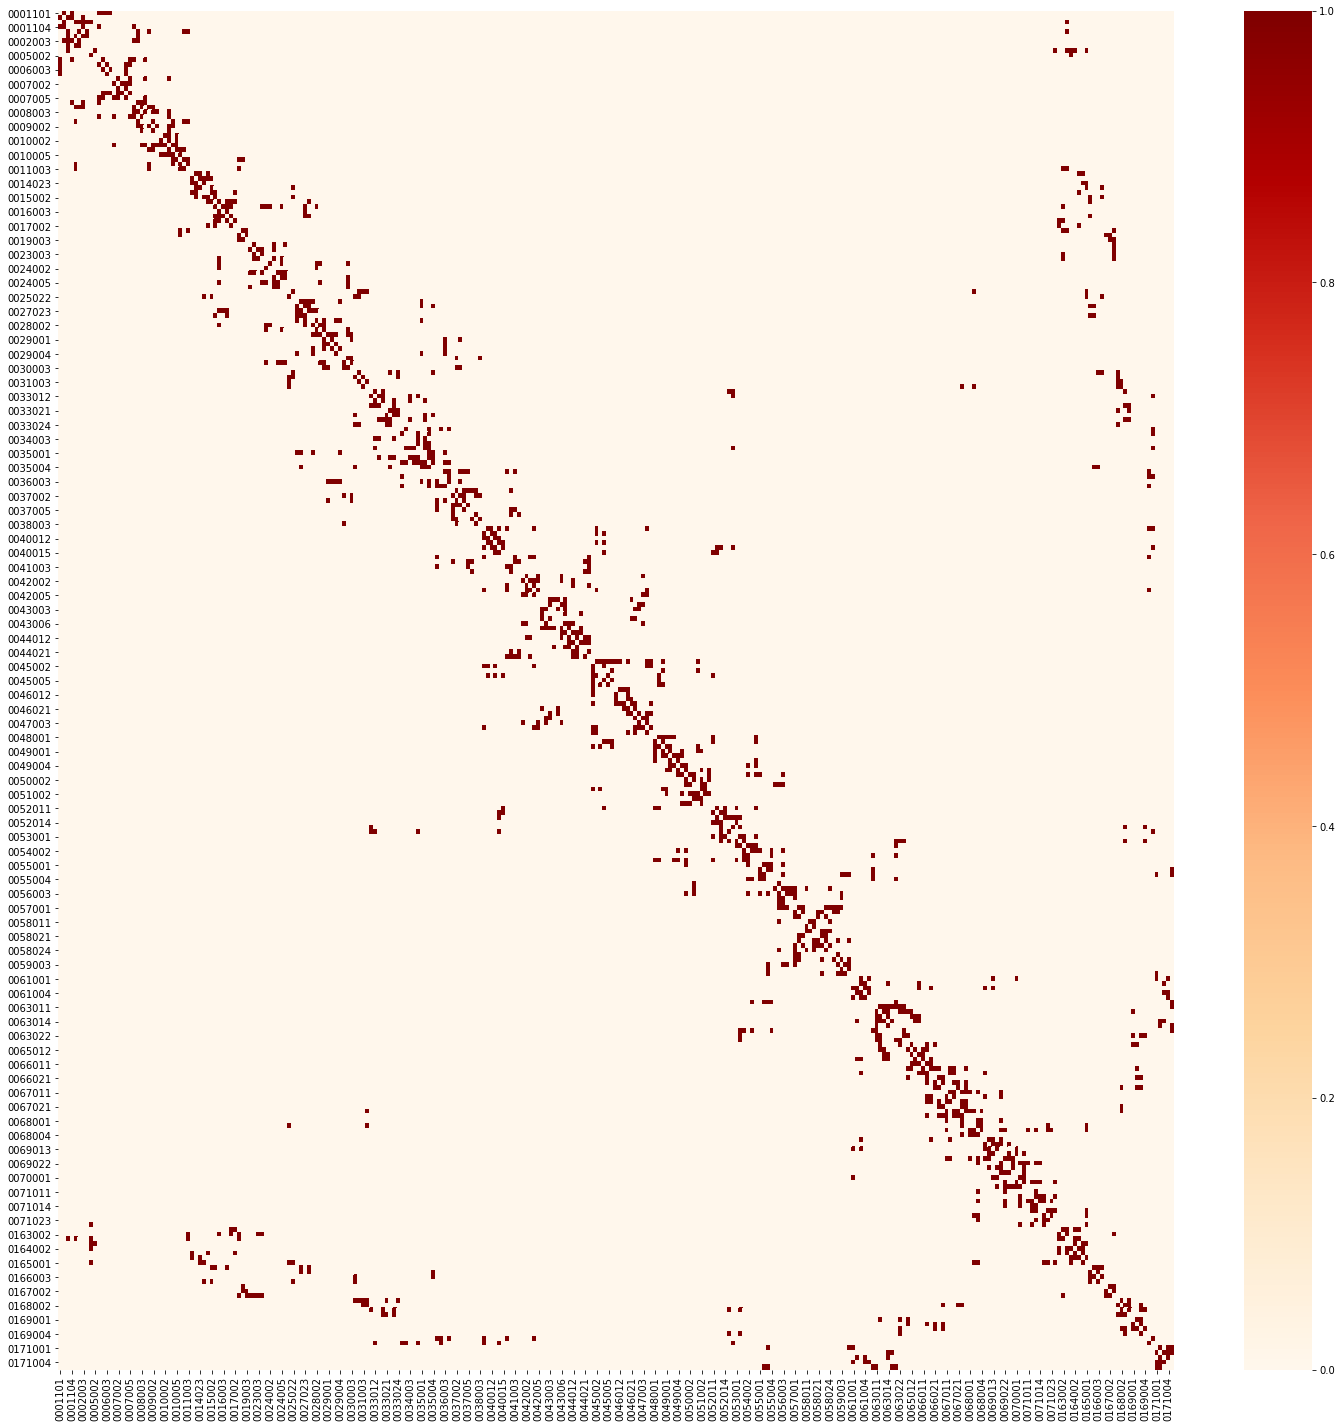

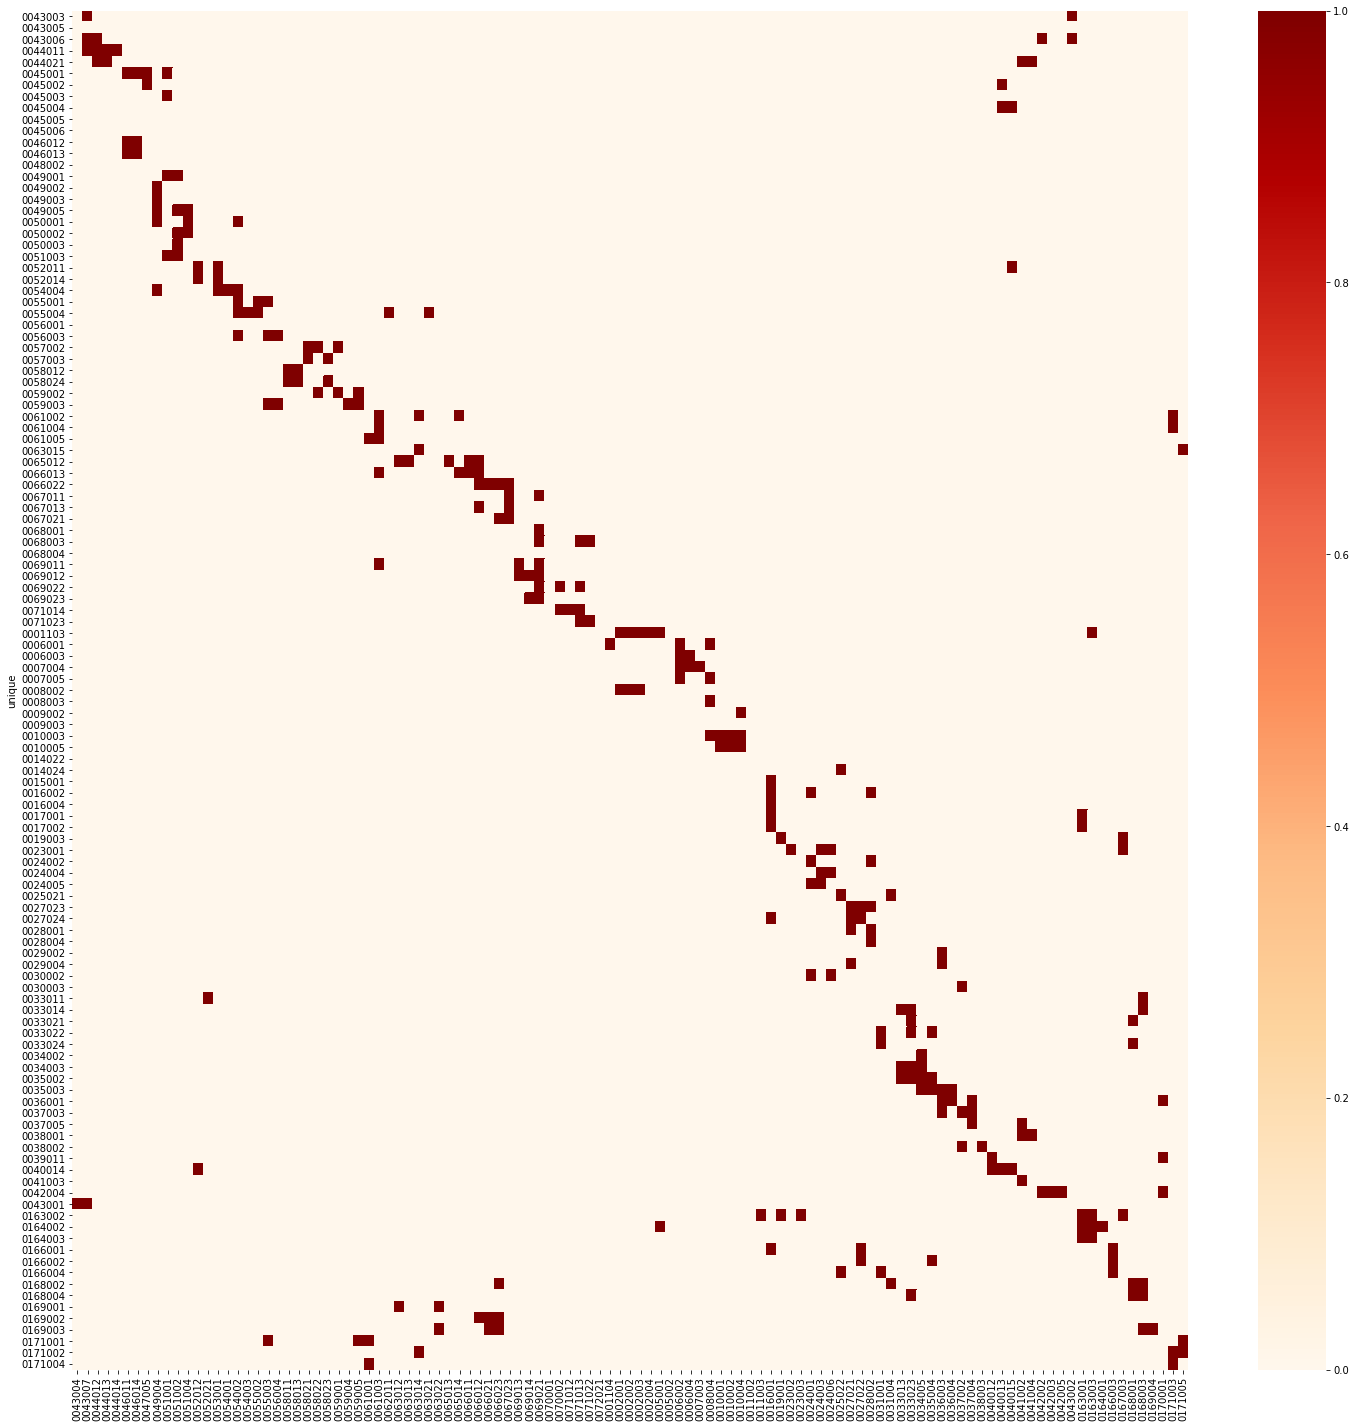

In [99]:
from matplotlib import pyplot
import seaborn as sns


a4_dims = (25, 25)

fig, ax = pyplot.subplots(figsize=a4_dims)

sns.heatmap(ax = ax,data=heat_map3, cmap= 'OrRd',xticklabels=True, yticklabels=True)


In [96]:
heat_map2

,0043003,0043005,0043006,0044011,0044021,0045001,0045002,0045003,0045004,0045005,...,0166002,0166004,0168002,0168004,0169001,0169002,0169003,0171001,0171002,0171004
unique,,,,,,,,,,,,,,,,,,,,,
0043003,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0043005,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0043006,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0044011,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0044021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0169002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
0169003,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
0171001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [92]:
heat_map3 = qw_df.loc[decreased_tracts][increased_tracts]
heat_map2 = qw_df.loc[decreased_tracts][decreased_tracts]
heat_map4 = qw_df.loc[increased_tracts][increased_tracts]  #variable african american 

### Here we see that to those tracts that decreased, the number of neighborhoods where their neighbor also increased 

In [106]:
heat_map3.sum().sum()# / (111*119)   # decreased vs increased 

292

,0043004,0043007,0044012,0044013,0044014,0046011,0046014,0047005,0049004,0051001,...,0163003,0164001,0166003,0167003,0168001,0168003,0169004,0170001,0171003,0171005
unique,,,,,,,,,,,,,,,,,,,,,
0043003,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0043005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0043006,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0044011,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0044021,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0169002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0169003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
0171001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Here we see that to those tracts that decreased, the number of neighborhoods where their neighbor also decreased 

In [94]:
heat_map2.sum().sum() # decreased vs decreased 

276

### Here we see that to those tracts that increased, the number of neighborhoods where their neighbor also increased 

In [95]:
heat_map4.sum().sum() # increased vs increase

240

In [76]:
qw_df.sum().sum() # overall sum of borders 

1704

In [ ]:
h